In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 컬럼의 개수를 맞추어주어 새로운 데이터 형식으로 저장
modified_count = 0

with open('product.csv', 'r', newline='', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader) 

    for row in rows:
        if len(row) > 10:  
            print(f"10번째 이후의 컬럼들: {row[9:]}")
            row[9] = ','.join(row[9:]) 
            del row[10:]  
            modified_count += 1

# 수정된 데이터의 개수 출력
print(f"수정된 데이터 개수: {modified_count}")

with open('EDA_product.csv', 'w', newline='', encoding='utf-8') as file:
    csv_writer = csv.writer(file)
    for row in rows:
        csv_writer.writerow(row)

10번째 이후의 컬럼들: ['Boss Men Perfume', ' After Shave Balm and Shower Gel Set']
10번째 이후의 컬럼들: ["Myntra Men's Yes", ' its all about me White T-shirt']
10번째 이후의 컬럼들: ['Turtle Men Formal Pink Tie', ' Cufflink and Pocket Square Combo Set']
10번째 이후의 컬럼들: ['Turtle Men Formal Purple Tie', ' Cufflink and Pocket Square Combo Set']
10번째 이후의 컬럼들: ['Newfeel Unisex White', ' Blue and Orange Casual Shoes']
10번째 이후의 컬럼들: ['Turtle Men Formal Purple Tie', ' Cufflink and Pocket Square Combo Set']
10번째 이후의 컬럼들: ['Turtle Men Formal Navy Blue Tie', ' Cufflink and Pocket Square Combo Set']
10번째 이후의 컬럼들: ['Turtle Men Formal Purple Tie', ' Cufflink and Pocket Square Combo Set']
10번째 이후의 컬럼들: ['Estelle Women Gold', ' Silver and Copper Toned Earrings']
10번째 이후의 컬럼들: ['Turtle Men Formal Black Tie', ' Cufflink and Pocket Square Combo Set']
10번째 이후의 컬럼들: ['Turtle Men Formal Red Tie', ' Cufflink and Pocket Square Combo Set']
10번째 이후의 컬럼들: ['Turtle Men Formal Blue Tie', ' Cufflink and Pocket Square Combo Set']
10번째 이후의 컬

In [3]:
df = pd.read_csv('EDA_product.csv')
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [4]:
df.rename(columns={'id':'product_id'}, inplace=True)
df

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [5]:
# year, usage 컬럼 삭제
df = df.drop(['year', 'usage'], axis=1)
df

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Rasasi Women Blue Lady Perfume


In [6]:
df.isnull().sum()

product_id             0
gender                 0
masterCategory         0
subCategory            0
articleType            0
baseColour            15
season                21
productDisplayName     7
dtype: int64

### 결측치 처리

#### baseColour

In [7]:
df[df['baseColour'].isnull()]

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
6207,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,Wrangler Men Blue Texas Jeans
9521,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,Wrangler Men Black Texas Jeans
12773,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,Wrangler Men Blue Texas Jeans
14302,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,NaN
15539,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,Lotus Herbals Quincenourish Quince Seed Nouris...
15721,41355,Men,Apparel,Bottomwear,Jeans,NaN,Fall,Wrangler Men Blue Millard Jeans
17281,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,GUESS Man Eau De Toilette 75 ml
17652,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,NaN
20222,11309,Men,Apparel,Bottomwear,Jeans,NaN,Fall,Wrangler Men Blue Floyd Jeans
23497,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,NaN


In [8]:
# 이름에 색깔이 들어있는 경우 존재 → 이름으로 색의 결측치 채우기

null_color = df[df['baseColour'].isnull()]

def fill_color(row):
    product_name = row['productDisplayName']
    
    if isinstance(product_name, str):
        if 'Blue' in product_name:
            return 'Blue'
        elif 'Black' in product_name:
            return 'Black'
    return np.nan

null_color['baseColour'] = null_color.apply(fill_color, axis=1)


# 원본 DataFrame에 결측치를 채워넣은 결과를 업데이트
df.update(null_color)
df

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Rasasi Women Blue Lady Perfume


In [9]:
df[df['baseColour'].isnull()]

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
14302,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,NaN
15539,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,Lotus Herbals Quincenourish Quince Seed Nouris...
17281,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,GUESS Man Eau De Toilette 75 ml
17652,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,NaN
23497,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,NaN
37549,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,NaN
40697,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,NaN
43282,43116,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,GUESS Seductive Women EDT Spray
44246,43120,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,GUESS by Marciano Men Eau De Toilette 50 ml


In [10]:
# 향수, 로션의 카테고리는 색이 없음 → colorlessness 로 결측치 채우기

def colorlessness(row):
    category = row['articleType']
    colorlessness = ['Perfume and Body Mist', 'Face Moisturisers']
    
    if category in colorlessness:
        return 'colorlessness'
    else:
        return row['baseColour']

df['baseColour'] = df.apply(colorlessness, axis=1)
df

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,colorlessness,Spring,Rasasi Women Blue Lady Perfume


In [11]:
df[df['baseColour'].isnull()]

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName


#### season

In [12]:
df[df['season'].isnull()]

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
282,5402,Women,Footwear,Shoes,Sports Shoes,Purple,NaN,Kalenji Ekiden 200 Wn Purple 2011
5997,5389,Unisex,Footwear,Shoes,Sports Shoes,Yellow,NaN,Kalenji Kapteren 200 Yellow Fw
6511,5380,Women,Footwear,Shoes,Sports Shoes,Purple,NaN,Quechua Forclaz 100 Lady Purple
12668,5392,Unisex,Footwear,Shoes,Sports Shoes,White,NaN,Kalenji Crossport 100 Whi/champ
13004,5361,Men,Footwear,Shoes,Sports Shoes,Black,NaN,Kipsta F300 Fg Sr Ah09
13533,5368,Men,Footwear,Shoes,Sports Shoes,Red,NaN,Kalenji Kiprun 1000 White Red Ss10
16055,5360,Women,Footwear,Shoes,Sports Shoes,Grey,NaN,Kalenji Kapteren 100 Blue/grey
21285,53781,Men,Apparel,Topwear,Tshirts,Blue,NaN,Puma Men Blue Sless Round Neck T-shirt
23848,5406,Women,Footwear,Shoes,Sports Shoes,Blue,NaN,Kalenji Ekiden Blue Scratch 2011
24211,5401,Women,Footwear,Shoes,Sports Shoes,Blue,NaN,Kalenji Ekiden 100 Lady Blue 2011


In [13]:
# 스포츠화의 경우, 계절성 X → all days(sports shoes) 로 결측치 채움

null_season = df[df['season'].isnull()]

def fill_season(row):
    category = row['articleType']
    
    if category == 'Sports Shoes':
        return 'all days(sports shoes)'
    
null_season['season'] = null_season.apply(fill_season, axis=1)


# 원본 DataFrame에 결측치를 채워넣은 결과를 업데이트
df.update(null_season)
df

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,colorlessness,Spring,Rasasi Women Blue Lady Perfume


In [14]:
df[df['season'].isnull()]

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
21285,53781,Men,Apparel,Topwear,Tshirts,Blue,NaN,Puma Men Blue Sless Round Neck T-shirt


![Alt text](image.png)

In [15]:
# 검색 결과, 제품 이름이 Puma Men Blue Sless Round Neck T-shirt인 경우 Summer로 결측치 채움

condition = df['productDisplayName'] == 'Puma Men Blue Sless Round Neck T-shirt'
df.loc[condition, 'season'] = 'Summer'

df

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,colorlessness,Spring,Rasasi Women Blue Lady Perfume


In [16]:
df[df['season'].isnull()]

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName


#### productDisplayName

In [17]:
df[df['productDisplayName'].isnull()]

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
3677,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,NaN
14302,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,colorlessness,Spring,NaN
17652,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,colorlessness,Spring,NaN
22102,42863,Women,Accessories,Bags,Clutches,Brown,Summer,NaN
23497,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,colorlessness,Spring,NaN
37549,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,colorlessness,Spring,NaN
40697,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,colorlessness,Spring,NaN


In [18]:
# productDisplayName 결측치 → 데이터 삭제

df = df.dropna(subset=['productDisplayName']).reset_index(drop=True)
df

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...
44434,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Gas Men Caddy Casual Shoe
44435,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Lotto Men's Soccer Track Flip Flop
44436,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Puma Men Graphic Stellar Blue Tshirt
44437,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,colorlessness,Spring,Rasasi Women Blue Lady Perfume


In [19]:
df.isnull().sum()

product_id            0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
productDisplayName    0
dtype: int64

### product_id

In [20]:
df['product_id'].duplicated().sum()

0

In [21]:
# product_id만 다른 데이터 추출

df[df.duplicated(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'productDisplayName'])]

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
186,21948,Women,Accessories,Bags,Handbags,Brown,Winter,Murcia Women Casual Brown Handbag
230,45603,Men,Footwear,Shoes,Formal Shoes,Black,Summer,Arrow Men Black Formal Shoes
349,41861,Men,Footwear,Sandal,Sandals,Black,Summer,Estd. 1977 Men Black Sandals
373,58726,Men,Apparel,Topwear,Tshirts,Grey,Summer,Puma Men Grey T-shirt
394,48786,Women,Accessories,Jewellery,Pendant,Silver,Summer,Lucera Women Silver Pendant
...,...,...,...,...,...,...,...,...
44420,37431,Women,Accessories,Bags,Handbags,Black,Summer,Murcia Women Black Handbag
44425,38479,Boys,Apparel,Topwear,Tshirts,Green,Summer,Gini and Jony Boys Core Green T-shirt
44426,33091,Women,Footwear,Shoes,Heels,Gold,Winter,Catwalk Women Gold Flats
44433,42234,Women,Apparel,Topwear,Tops,Blue,Summer,Sepia Women Blue Printed Top


In [22]:
# 11462개의 데이터가 중복됨 → 데이터 정제 필요

# dict를 사용해서 product_id 중복값을 처리

In [23]:
# product_id가 중복되는 데이터
dup = df[df.duplicated(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'productDisplayName'])]
dup = dup.sort_values(by='productDisplayName').reset_index(drop=True)
print(len(df))
print(len(dup))

44439
11462


In [24]:
# 중복 제거
df_del = df.drop_duplicates(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'productDisplayName']).reset_index(drop=True)

In [25]:
id_dict = {}

for i, row in dup.iterrows():
    condition = (
        df_del['gender'] == row['gender']) & (
        df_del['masterCategory'] == row['masterCategory']) & (
        df_del['subCategory'] == row['subCategory']) & (
        df_del['articleType'] == row['articleType']) & (
        df_del['baseColour'] == row['baseColour']) & (
        df_del['season'] == row['season']) & (
        df_del['productDisplayName'] == row['productDisplayName']
    )
    
    matching_product_id = df_del[condition]['product_id'].values
    if len(matching_product_id) > 0:
        id_dict[row['product_id']] = matching_product_id[0]

len(id_dict)

11462

In [26]:
# 중복 제거한 모든 product_id 딕셔너리 생성 (NaN값 없애기 위해)
dict_all = {}
for i in range(len(df_del)):
    dict_all[df_del['product_id'][i]] = df_del['product_id'][i]
print(len(dict_all))

# dict 합치기
id_dict.update(dict_all)
print(len(id_dict))

32977
44439


In [27]:
df['product_id'] = df['product_id'].map(id_dict)

df = df.drop_duplicates().reset_index(drop=True)
df

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...
32972,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,Tantra Women Printed Peach T-shirt
32973,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Gas Men Caddy Casual Shoe
32974,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Lotto Men's Soccer Track Flip Flop
32975,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Puma Men Graphic Stellar Blue Tshirt


In [28]:
# product_id가 존재하는 transaction 데이터에도 적용 필요

tr = pd.read_csv('EDA_transaction.csv')
tr['product_id'] = tr['product_id'].map(id_dict)

# 수정된 파일 저장
tr.to_csv("EDA_transaction.csv", index=False, encoding="utf-8-sig", mode="w")

In [29]:
set(tr['product_id'].unique()) - set(df['product_id'].unique())

{nan}

In [30]:
# product_id가 존재하는 click_stream 데이터에도 적용 필요

cl = pd.read_csv('click_stream.csv')
cl['product_id'] = cl['product_id'].map(id_dict)

# 수정된 파일 저장
cl.to_csv("EDA_click_stream.csv", index=False, encoding="utf-8-sig", mode="w")

In [31]:
set(cl['product_id'].unique()) - set(df['product_id'].unique())

{nan}

In [32]:
# 수정된 파일 → 파케이(parquet) 형식으로 저장
import pyarrow as pa
import pyarrow.parquet as pq

data_table = pa.Table.from_pandas(cl, preserve_index=False)
pq.write_table(data_table, 'EDA_click_stream.parquet')

### gender

In [33]:
df['gender'].value_counts(normalize=True)

gender
Men       0.496983
Women     0.417261
Unisex    0.055766
Boys      0.016587
Girls     0.013403
Name: proportion, dtype: float64

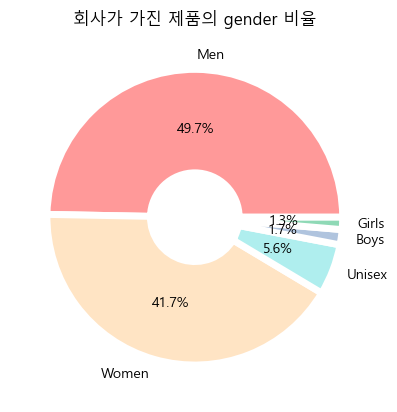

In [34]:
plt.rcParams['font.family'] = 'Malgun Gothic'
colors = ['#ff9999', 'bisque', 'paleturquoise', 'lightsteelblue', '#8fd9b6', 'silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

gender_counts = df['gender'].value_counts(normalize=True)
plt.title('회사가 가진 제품의 gender 비율')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

In [35]:
# 고객은 여성이 남성보다 두 배가량 많은데 본 회사가 가진 제품은 남성제품이 조금 더 많음 (문제점 1)

### masterCategory

In [36]:
df['masterCategory'].value_counts(normalize=True)

masterCategory
Apparel           0.494951
Accessories       0.218516
Footwear          0.213785
Personal Care     0.069473
Free Items        0.002487
Sporting Goods    0.000758
Home              0.000030
Name: proportion, dtype: float64

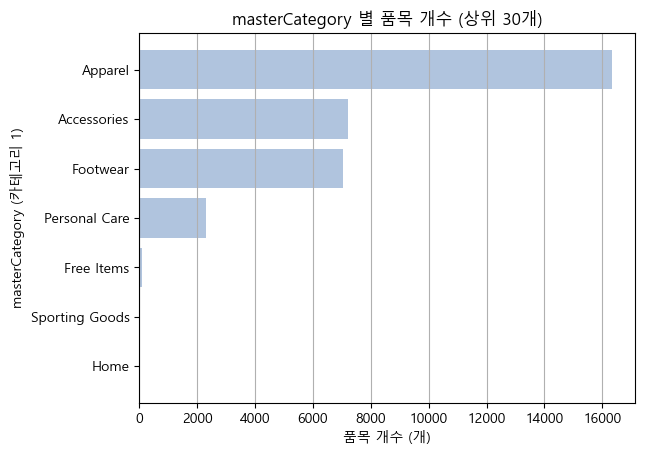

In [37]:
category_counts = df['masterCategory'].value_counts().head(30)  # (상위 30개만)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.barh(category_counts.index, category_counts.values, color='lightsteelblue')

plt.xlabel('품목 개수 (개)')
plt.ylabel('masterCategory (카테고리 1)')
plt.title('masterCategory 별 품목 개수 (상위 30개)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

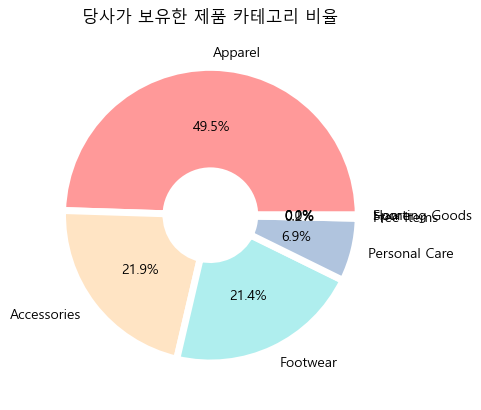

In [38]:
category_counts = df['masterCategory'].value_counts(normalize=True)
colors = ['#ff9999', 'bisque', 'paleturquoise', 'lightsteelblue', '#8fd9b6', 'silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.title('당사가 보유한 제품 카테고리 비율')
plt.show()

In [39]:
sales = tr.groupby('product_id', as_index=False)['quantity'].sum()
sales

,product_id,quantity
0,1163.0,39
1,1164.0,29
2,1165.0,31
3,1525.0,47
4,1526.0,31
...,...,...
32972,59988.0,61
32973,59990.0,60
32974,59994.0,60
32975,59996.0,29


In [40]:
df = pd.merge(df, sales, on='product_id', how='inner')
df

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,productDisplayName,quantity
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Turtle Check Men Navy Blue Shirt,44
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Peter England Men Party Blue Jeans,35
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Titan Women Silver Watch,206
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Manchester United Men Solid Black Track Pants,45
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Puma Men Grey T-shirt,226
...,...,...,...,...,...,...,...,...,...
32972,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,Tantra Women Printed Peach T-shirt,40
32973,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Gas Men Caddy Casual Shoe,41
32974,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Lotto Men's Soccer Track Flip Flop,59
32975,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Puma Men Graphic Stellar Blue Tshirt,41


In [41]:
data = df.groupby('masterCategory', as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)
data['ratio'] = (data['quantity'] / data['quantity'].sum()).round(3)
data

,masterCategory,quantity,ratio
1,Apparel,890251,0.481
0,Accessories,470209,0.254
2,Footwear,384110,0.208
5,Personal Care,100412,0.054
3,Free Items,4415,0.002
6,Sporting Goods,984,0.001
4,Home,26,0.000


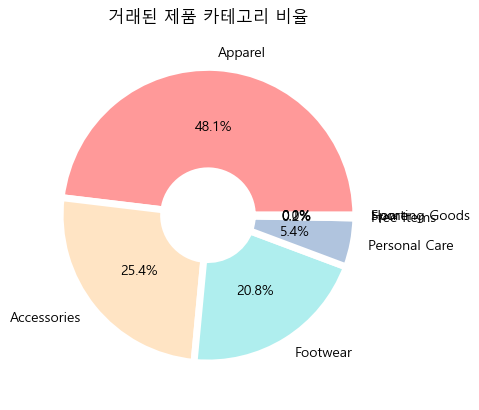

In [42]:
categories = data['masterCategory'].tolist()
quantity = data['ratio'].tolist()

colors = ['#ff9999', 'bisque', 'paleturquoise', 'lightsteelblue', '#8fd9b6', 'silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(quantity, labels=categories, autopct='%1.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.title('거래된 제품 카테고리 비율')
plt.show()

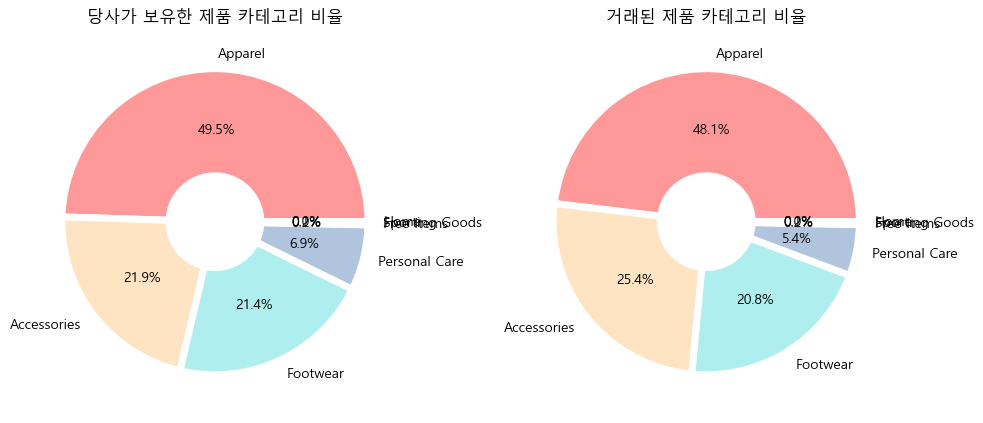

In [43]:
colors = ['#ff9999', 'bisque', 'paleturquoise', 'lightsteelblue', '#8fd9b6', 'silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
category_counts = df['masterCategory'].value_counts(normalize=True)
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.title('당사가 보유한 제품 카테고리 비율')

plt.subplot(1, 2, 2)
categories = data['masterCategory'].tolist()
quantity = data['ratio'].tolist()
plt.pie(quantity, labels=categories, autopct='%1.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.title('거래된 제품 카테고리 비율')

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()

In [44]:
# 당사가 보유한 제품에 비례해서 구매로 이어짐을 확인 → 소비를 유도하려면 제품의 종류를 늘리면 될 것으로 판단 (다양한 제품 구비)

### subCategory

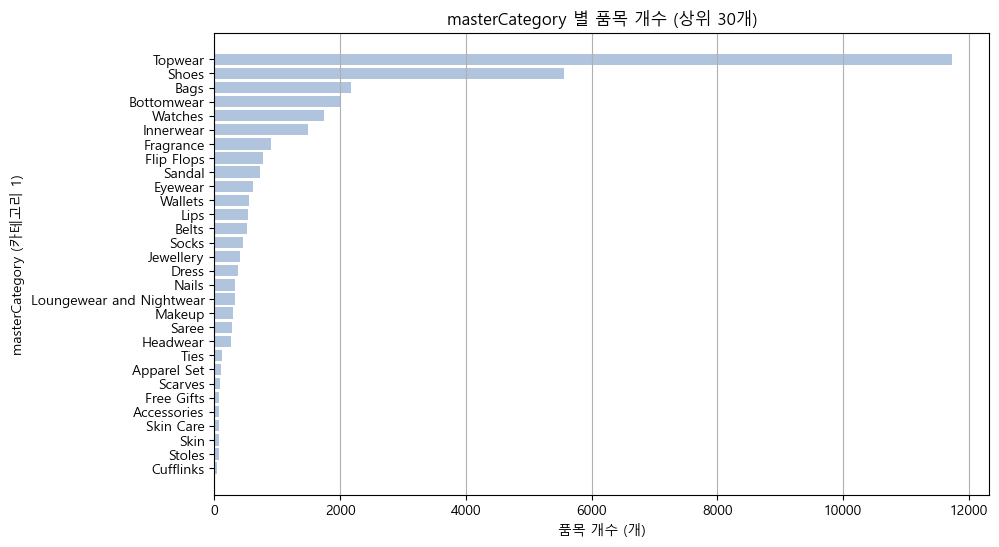

In [45]:
category_counts = df['subCategory'].value_counts().head(30)  # (상위 30개만)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))

plt.barh(category_counts.index, category_counts.values, color='lightsteelblue')

plt.xlabel('품목 개수 (개)')
plt.ylabel('masterCategory (카테고리 1)')
plt.title('masterCategory 별 품목 개수 (상위 30개)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [46]:
# 본 회사가 보유한 제품의 카테고리가 topwear, shoes 품목에 집중되어있음 → 다양한 상품 구비 필요 (문제점 2)

### articleType

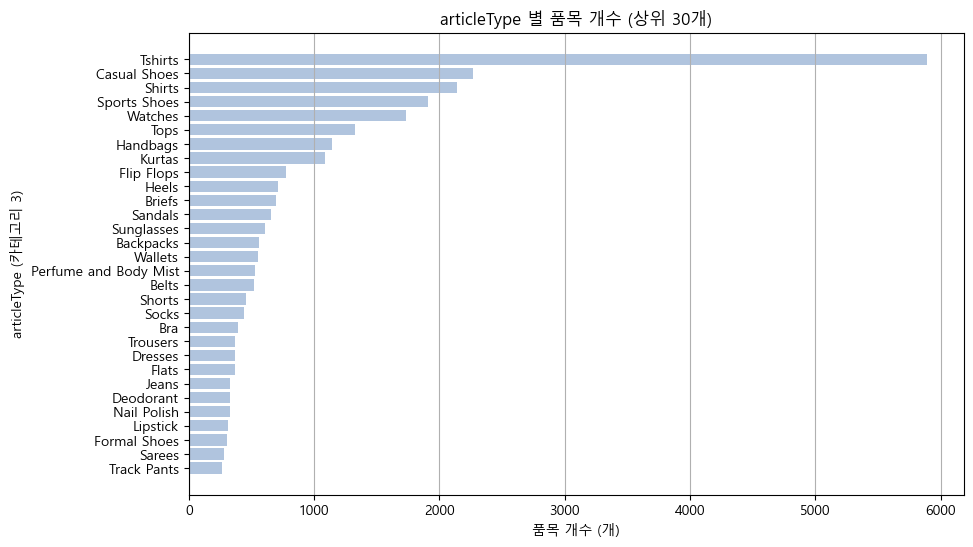

In [47]:
category_counts3 = df['articleType'].value_counts().head(30)  # (상위 30개만)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))

plt.barh(category_counts3.index, category_counts3.values, color='lightsteelblue')

plt.xlabel('품목 개수 (개)')
plt.ylabel('articleType (카테고리 3)')
plt.title('articleType 별 품목 개수 (상위 30개)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

### season

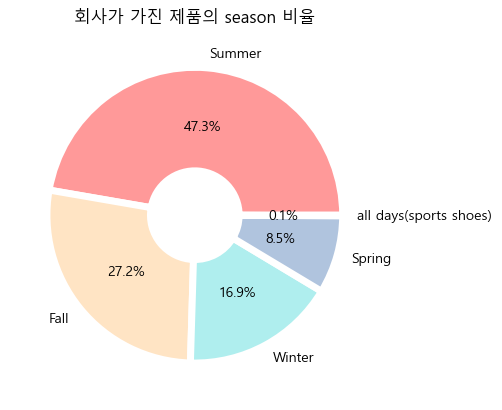

In [48]:
colors = ['#ff9999', 'bisque', 'paleturquoise', 'lightsteelblue', '#8fd9b6', 'silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

gender_counts = df['season'].value_counts(normalize=True)
plt.title('회사가 가진 제품의 season 비율')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

In [49]:
# 여름 상품이 많이 구비되어 있음

In [50]:
# 수정된 내용 저장
df.to_csv("EDA_product.csv", index=False, encoding="utf-8-sig", mode="w")